# LGMVIP August Data Science Internship task1

Iris Flower Classification ML Project

# Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics
import seaborn as sns

# Importing Dataset

In [52]:
dataset = pd.read_csv('C:/Users/Dell/OneDrive/Desktop/iris.csv')

In [53]:
dataset.head

<bound method NDFrame.head of      sepal lengthcm  sepal width cm  petal length cm  petal width cm  \
0               5.1             3.5              1.4             0.2   
1               4.9             3.0              1.4             0.2   
2               4.7             3.2              1.3             0.2   
3               4.6             3.1              1.5             0.2   
4               5.0             3.6              1.4             0.2   
..              ...             ...              ...             ...   
145             6.7             3.0              5.2             2.3   
146             6.3             2.5              5.0             1.9   
147             6.5             3.0              5.2             2.0   
148             6.2             3.4              5.4             2.3   
149             5.9             3.0              5.1             1.8   

            classes  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-seto

In [54]:
dataset.head(100)

,sepal lengthcm,sepal width cm,petal length cm,petal width cm,classes
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,Iris-versicolor
96,5.7,2.9,4.2,1.3,Iris-versicolor
97,6.2,2.9,4.3,1.3,Iris-versicolor
98,5.1,2.5,3.0,1.1,Iris-versicolor


In [55]:
dataset.tail(100)

,sepal lengthcm,sepal width cm,petal length cm,petal width cm,classes
50,7.0,3.2,4.7,1.4,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor
53,5.5,2.3,4.0,1.3,Iris-versicolor
54,6.5,2.8,4.6,1.5,Iris-versicolor
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [56]:
dataset.shape

(150, 5)

In [57]:
dataset.isnull().sum()

sepal lengthcm     0
sepal width cm     0
petal length cm    0
petal width cm     0
classes            0
dtype: int64

In [58]:
dataset.isnull()

,sepal lengthcm,sepal width cm,petal length cm,petal width cm,classes
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [59]:
print(dataset['classes'].describe())

count             150
unique              3
top       Iris-setosa
freq               50
Name: classes, dtype: object


In [60]:
print(dataset['classes'].value_counts())

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: classes, dtype: int64


In [61]:
x=dataset.iloc[:,[0,1,2,3]].values

In [62]:
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [63]:
y=dataset.iloc[:,4].values

In [64]:
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [65]:
dataset.dtypes

sepal lengthcm     float64
sepal width cm     float64
petal length cm    float64
petal width cm     float64
classes             object
dtype: object

In [66]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state=0)

In [67]:
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

#Tree induction using Gini Index
dtree_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=3, 
min_samples_leaf=5)
dtree_gini.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

In [68]:
y_pred1 = dtree_gini.predict(xtest)
print("Predicted values:")
y_pred1

Predicted values:


array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

# Perform the Accuracy of Iris dataset

In [69]:
accgini= accuracy_score(ytest,y_pred1)*100
print ("\n\nAccuracy using Gini Index: ", accgini)



Accuracy using Gini Index:  89.47368421052632


In [70]:
data=dataset.groupby('classes')

In [71]:
cm = confusion_matrix(ytest, y_pred1)
print ("\n\n Confusion Matrix -using Gini Index: \n", cm)



 Confusion Matrix -using Gini Index: 
 [[13  0  0]
 [ 0 15  1]
 [ 0  3  6]]


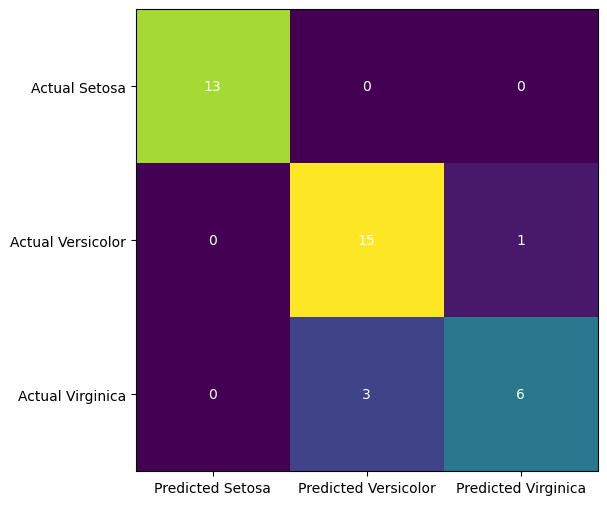

In [72]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1,2), ticklabels=('Predicted Setosa', 'Predicted Versicolor', 'Predicted Virginica'))
ax.yaxis.set(ticks=(0,1,2), ticklabels=('Actual Setosa', 'Actual Versicolor', 'Actual Virginica'))
ax.set_ylim(2.5, -0.5)
for i in range(3):
   for j in range(3):
      ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

In [73]:
print("\n\nClassification Report – Using Gini Index: \n",classification_report(ytest, y_pred1))



Classification Report – Using Gini Index: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.83      0.94      0.88        16
 Iris-virginica       0.86      0.67      0.75         9

       accuracy                           0.89        38
      macro avg       0.90      0.87      0.88        38
   weighted avg       0.90      0.89      0.89        38



In [74]:
data.head()

,sepal lengthcm,sepal width cm,petal length cm,petal width cm,classes
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
50,7.0,3.2,4.7,1.4,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor
53,5.5,2.3,4.0,1.3,Iris-versicolor
54,6.5,2.8,4.6,1.5,Iris-versicolor


In [75]:
dataset['classes'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [76]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal lengthcm   150 non-null    float64
 1   sepal width cm   150 non-null    float64
 2   petal length cm  150 non-null    float64
 3   petal width cm   150 non-null    float64
 4   classes          150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Visualization of Iris Data(classification)

[Text(0.375, 0.875, 'x[2] <= -0.807\ngini = 0.665\nsamples = 112\nvalue = [37, 34, 41]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(0.5, 0.625, 'x[2] <= 0.644\ngini = 0.496\nsamples = 75\nvalue = [0, 34, 41]'),
 Text(0.25, 0.375, 'x[3] <= 0.421\ngini = 0.153\nsamples = 36\nvalue = [0, 33, 3]'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(0.375, 0.125, 'gini = 0.5\nsamples = 6\nvalue = [0, 3, 3]'),
 Text(0.75, 0.375, 'x[3] <= 0.806\ngini = 0.05\nsamples = 39\nvalue = [0, 1, 38]'),
 Text(0.625, 0.125, 'gini = 0.198\nsamples = 9\nvalue = [0, 1, 8]'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 30\nvalue = [0, 0, 30]')]

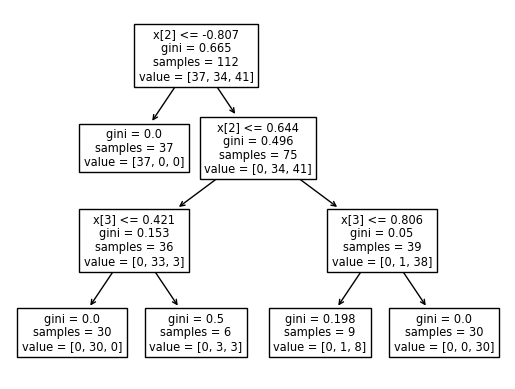

In [77]:
tree.plot_tree(dtree_gini)

sepal lengthcm        Axes(0.125,0.786098;0.352273x0.0939024)
sepal width cm     Axes(0.547727,0.786098;0.352273x0.0939024)
petal length cm       Axes(0.125,0.673415;0.352273x0.0939024)
petal width cm     Axes(0.547727,0.673415;0.352273x0.0939024)
dtype: object

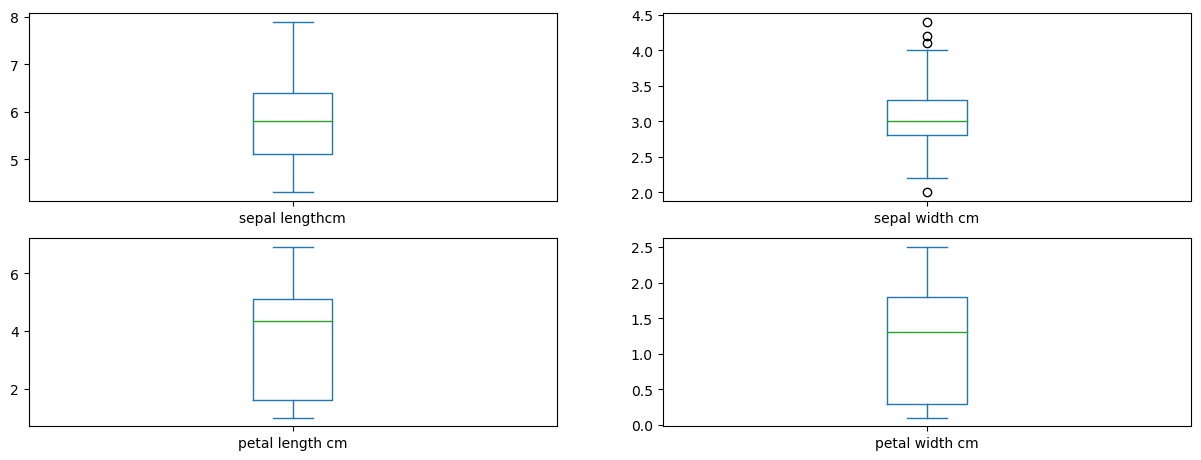

In [78]:
dataset.plot(kind='box',subplots=True,layout=(7,2),figsize=(15,20))

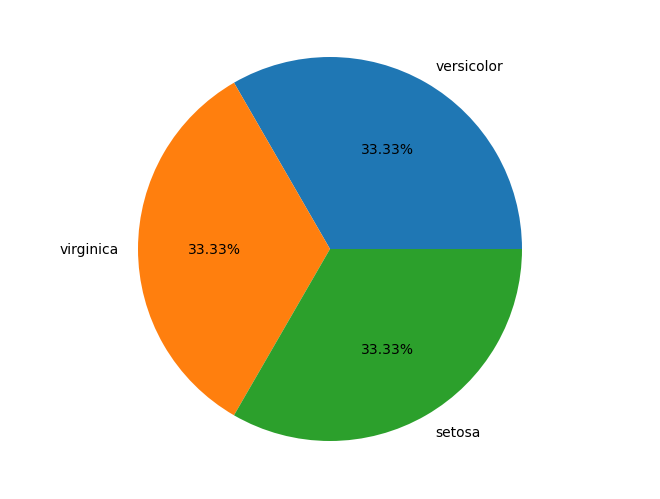

In [79]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.axis('equal')
l=['versicolor','virginica','setosa']
s=[50,50,50]
ax.pie(s, labels=l,autopct='%1.2f%%')
plt.show()

In [81]:
dataset

,sepal lengthcm,sepal width cm,petal length cm,petal width cm,classes
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


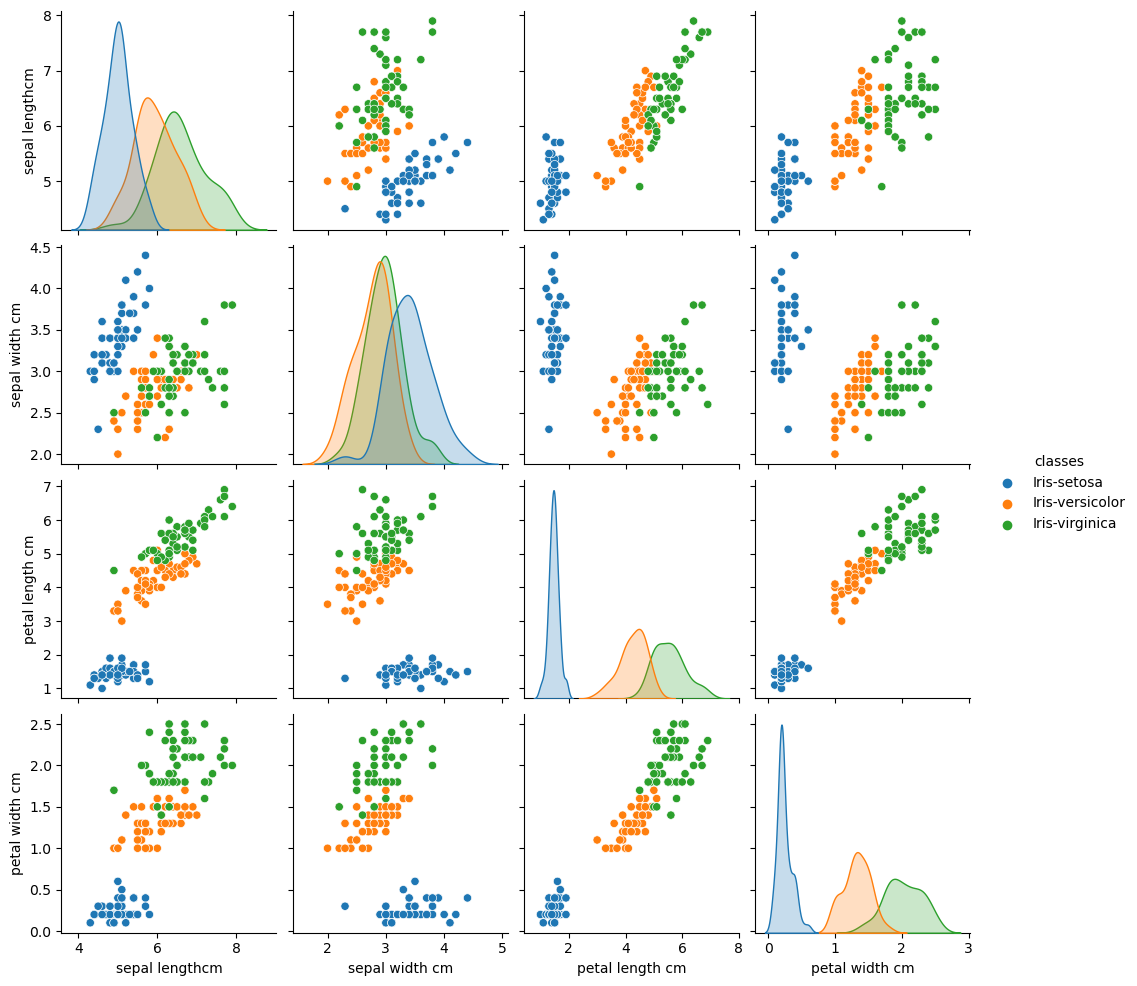

In [83]:
sns.pairplot(dataset,hue='classes')

C:\Users\Dell\AppData\Local\Temp\ipykernel_10996\2676893432.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr())


<Axes: >

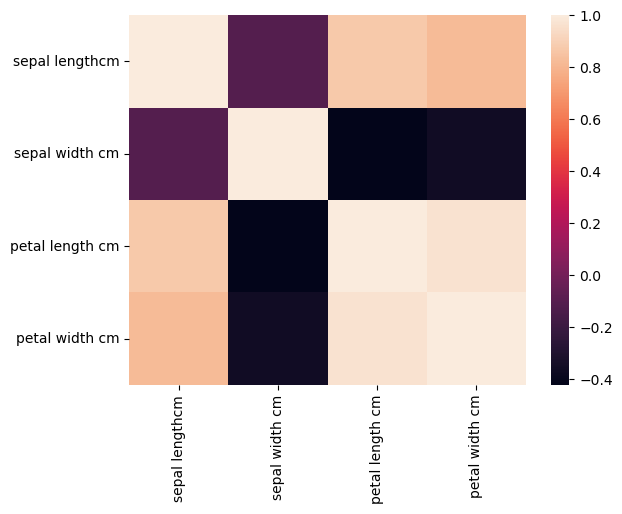

In [80]:
sns.heatmap(dataset.corr())

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

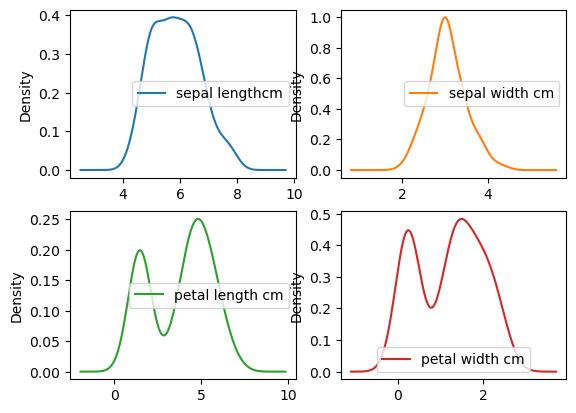

In [84]:
dataset.plot(kind='density',subplots=True,layout=(2,2),sharex=False)

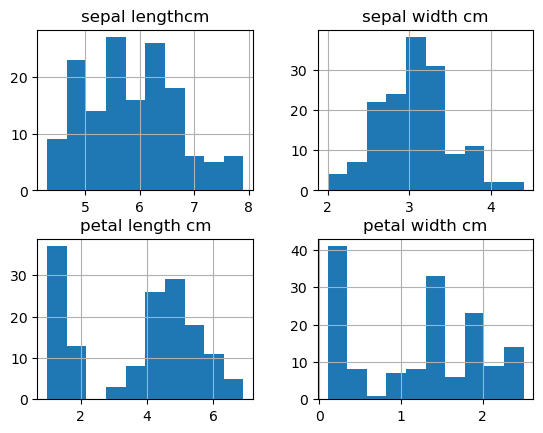

In [82]:
dataset.hist()
plt.show()